## Import and setup

In [1]:
import pandas as pd
import numpy as np
import pickle
import warnings
warnings.filterwarnings('ignore')
import PIL
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
with open('results/final_pipeline.pickle', 'rb') as file:
    pipeline = pickle.load(file)
data = pd.read_csv('results/cleaned.csv')

In [3]:
data.fillna(value = '', inplace=True)

## analisi separata

In [11]:
for piattaforma in data['piattaforma'].unique():
  print("-------", piattaforma, "-------")
  temp = data[data['piattaforma'] == piattaforma]
  try:
    pipeline.fit(temp['commento_p'], temp['target'])
  except:
    print("too small size")
    continue
  ##positive
  index_positive = np.argsort(-1*pipeline[1].coef_)[0][: 10]
  print("\t Positive")
  for i in index_positive:
    print(pipeline[0].get_feature_names()[i])
  ##neutral 
  index_neutral = np.argsort(-1*pipeline[1].coef_)[0]
  index_neutral = index_neutral[int(len(index_neutral)/2 )- 5 : int(len(index_neutral)/2) + 5]
  print("\t Neutral")
  for i in index_neutral:
    print(pipeline[0].get_feature_names()[i])
  ##negative
  index_negative = np.argsort(pipeline[1].coef_)[0][: 10]
  print("\t Negative")
  for i in index_negative:
    print(pipeline[0].get_feature_names()[i])


------- bandi online -------
	 Positive
non
poca
documenti
poco
troppo
poco intuitivo
tempi
già
passaggi troppa
cittadino molto
	 Neutral
validazione caricato
sbagliato
non_piu non_tornare
non_piu non_stato
non_irrisolto non_occorre
non_irrisolto
non_correggere non_errore
non_ogni non_pagina
esempio sbagliato
lavori amianto
	 Negative
semplice
abbastanza
po
facile
chiaro
alcune
tempi troppo
ottima
buono
trovato
------- siage -------
	 Positive
troppo
lento
diverse
complicata rendicontazione
molto
poca
troppo burocratico
siage
non_errori
troppe
	 Neutral
non_installazione
effettiva nessuna
non_quindi non_fare
non_sola
risulta
non_accettazione non_progetto
non_elenco non_riassuntivo
schemi tipo
non_tutta non_procedura
schemi
	 Negative
semplice
gestione
chiaro
rendicontazione troppo
rispetto
intuitivo
fase
tempi
buono
complesso
------- pec-peo -------
	 Positive
informazione
complesso
molto complesso
non
modulo
non_esatta
complesso laborioso
laborioso
non_documenti
linguaggio
	 Neutral
n

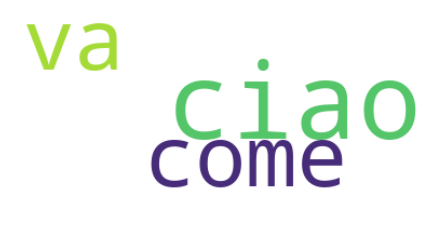

In [5]:
wordcloud = WordCloud(background_color='white').generate("ciao come va")
plt.axis("off")
#plt.figure( figsize = (15, 10))
plt.tight_layout(pad = 0)
plt.imshow(wordcloud, interpolation = 'bilinear')

In [6]:
data.head()

,bando,piattaforma,commento_p,target
0,faber i ed,bandi online,troppe informazioni ripetere moduli facilmente...,1
1,e di nuovo sport,bandi online,facile comprensibile utilizzo,2
2,smaltimento amianto anno 2019,bandi online,non non_ricevuto non_risposta non_richiesta no...,1
3,musei 2016,siage,non non_automatismi non_sistema non_funzionano...,1
4,rinnova autoveicoli,bandi online,non non_chiari non_percorsi non_operare non_pa...,1


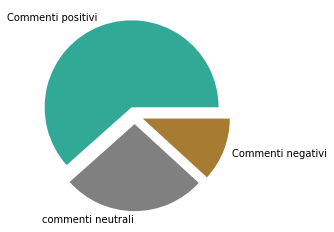

In [7]:
npositive = len(data[data['target'] == 2])
nneutral = len(data[data['target'] == 1])
y = np.array([npositive, nneutral, len(data) - npositive - nneutral])
mylabels = ["Commenti positivi", "commenti neutrali", "Commenti negativi"]
colors = ['#32a897', 'grey' ,'#a87b32']

plt.pie(y, labels = mylabels, colors = colors, explode = [0.1, 0.1, 0.1])
plt.show() 

In [8]:
data[data['target'] == 1]

,bando,piattaforma,commento_p,target
0,faber i ed,bandi online,troppe informazioni ripetere moduli facilmente...,1
2,smaltimento amianto anno 2019,bandi online,non non_ricevuto non_risposta non_richiesta no...,1
3,musei 2016,siage,non non_automatismi non_sistema non_funzionano...,1
4,rinnova autoveicoli,bandi online,non non_chiari non_percorsi non_operare non_pa...,1
5,asd 2019,bandi online,laborioso fase finale non non_molto non_chiaro...,1
...,...,...,...,...
2176,sicurezza_urbana_lotto_a_2017,siage,specifico ritengo ringraziare funzionari regio...,1
2177,legge 50 anno 2019,bandi online,difficile farraginosa strada seguire volta ent...,1
2178,asd 2018,bandi online,ok,1
2179,smaltimento amianto anno 2019,bandi online,non non_sempre non_chiare non_domande non_defi...,1
